<a href="https://colab.research.google.com/github/Jems-Chawin/Covid-19-Patient-Status-Classification/blob/main/Copy_of_Covid_19_Dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'covid19-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2633044%2F4504149%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240305%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240305T093803Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D865362b97f20fa659869f1563a8c97404c6871081f8d018725a093420bc5c06fcd55e1414f4e8ab13ecaeef711811daa93500c0dcbd1fe57c0b38239901a078b325f9b2dcaadef90405adc11e25b47a7947593947108e2d5a6aa311a5b56dd6d9ce2e8b082acb1b9be7ad7b74a5c8321b4f9a4e5d184b23f53ed8726560d2f4f93878961d88c0e323d09671b9d7338daec433b208dad01bb9ae8cb078c91ade91177b7edf3a1dd004fb75b6bcb29e3962297f16ad0dcbdf08fbc37a69e5f4f4e8f6d6271df2c44957e05ab77965fb5f7845534b3e60d86e15197bba741a6652d9596fda35f3baf78adcd2b0fc8bc0f6b7d5137b9910e8c4d37033fcdc552a506'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4890659 bytes downloaded
Downloaded and uncompressed: covid19-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv


# **Data Preparation**

In [ ]:
raw_data = pd.read_csv("../input/covid19-dataset/Covid Data.csv")

In [ ]:
raw_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Best practice is to copy the original data first

In [ ]:
df = raw_data.copy()

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

### **Observation** : There is no NaN in the dataframe

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,1.632,8.981,1.499,1.191,79.523,3.347,41.794,49.766,2.186,2.261,2.243,2.298,2.129,2.435,2.262,2.125,2.257,2.214,5.306,79.554
std,0.482,3.723,0.500,0.393,36.869,11.913,16.907,47.511,5.424,5.132,5.114,5.463,5.236,6.647,5.195,5.175,5.135,5.323,1.881,36.823
min,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,1.000,4.000,1.000,1.000,97.000,2.000,30.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,97.000
50%,2.000,12.000,1.000,1.000,97.000,2.000,40.000,97.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,6.000,97.000
75%,2.000,12.000,2.000,1.000,97.000,2.000,53.000,97.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,7.000,97.000
max,2.000,13.000,2.000,2.000,99.000,99.000,121.000,98.000,98.000,98.000,98.000,98.000,98.000,98.000,98.000,98.000,98.000,98.000,7.000,99.000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

In [ ]:
for i in df.columns:
    print("{:<20} => {:>10}".format(i, df[i].nunique()))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


### **Features information**
* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [ ]:
df["SEX"].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [ ]:
df["AGE"].value_counts()

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
115        2
114        2
121        1
111        1
113        1
Name: AGE, Length: 121, dtype: int64

In [ ]:
df["CLASIFFICATION_FINAL"].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
df["PATIENT_TYPE"].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [ ]:
df["PNEUMONIA"].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [ ]:
df["PREGNANT"].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [ ]:
df["DIABETES"].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [ ]:
df["COPD"].value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [ ]:
df["ASTHMA"].value_counts()

2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [ ]:
df["INMSUPR"].value_counts()

2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [ ]:
df["HIPERTENSION"].value_counts()

2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [ ]:
df["CARDIOVASCULAR"].value_counts()

2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [ ]:
df["RENAL_CHRONIC"].value_counts()

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [ ]:
df["OTHER_DISEASE"].value_counts()

2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [ ]:
df["OBESITY"].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [ ]:
df["TOBACCO"].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [ ]:
df["USMER"].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

In [ ]:
df["MEDICAL_UNIT"].value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [ ]:
df["INTUBED"].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [ ]:
df["ICU"].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [ ]:
df["DATE_DIED"].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
01/01/2021         1
30/12/2020         1
10/01/2021         1
14/01/2021         1
19/01/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

### **Observation** : "9999-99-99" means the patient is still alive

In [ ]:
df["DEATH"] = [2 if each == "9999-99-99" else 1 for each in df["DATE_DIED"]]
df["DEATH"].value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

## Remove missing values

In [ ]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [ ]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,2
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,2


## **Should the duplicates be removed?**

In [ ]:
df.duplicated().sum()

802497

In [ ]:
# df = df.drop_duplicates()

### **Observation** : the column DATE_DIED is no longer needed

In [ ]:
df = df.drop("DATE_DIED", axis=1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


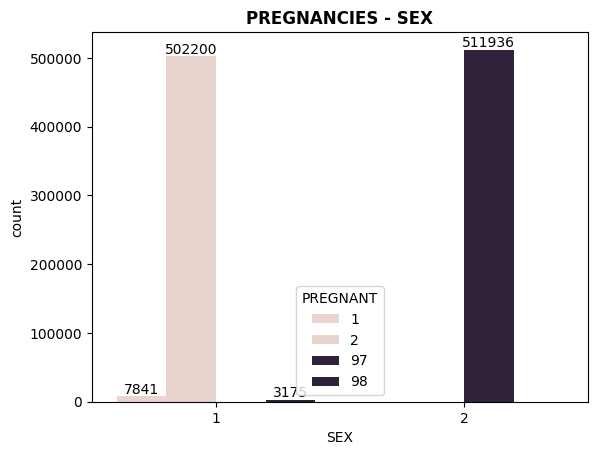

In [ ]:
plt.figure()
ax = sns.countplot(x=df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", fontweight="bold")
plt.show()

### **Inference** : the value 97 is just male's pregnancy which is impossible. So we can replace with 2.

In [ ]:
df.PREGNANT = df.PREGNANT.replace(97, 2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

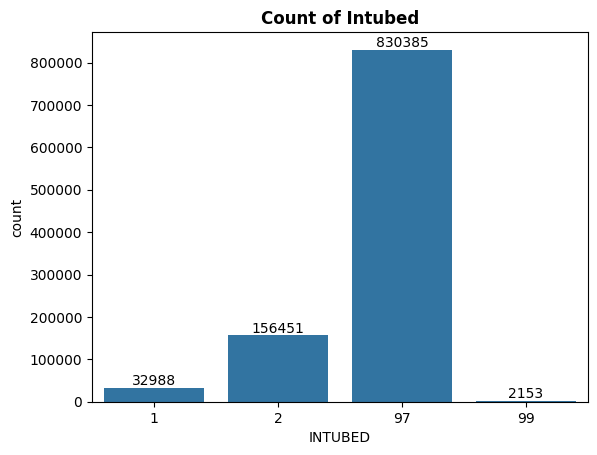

In [ ]:
ax = sns.countplot(x = df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed", fontweight="bold")
plt.show()

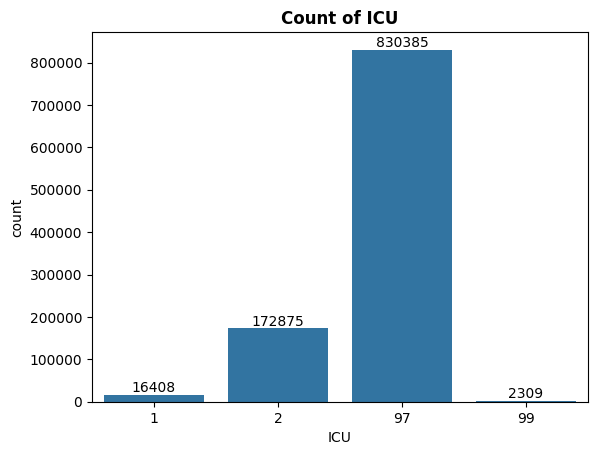

In [ ]:
ax = sns.countplot(x = df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU", fontweight="bold")
plt.show()

### **Observation** : INTUBED and ICU have too many missing values. So better to get rid of them.

In [ ]:
df = df.drop("INTUBED", axis = 1)
df = df.drop("ICU", axis = 1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


### **Observation** : classification of 1-3 simply means COVID and 4-7 means not COVID.

In [ ]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [ ]:
df.CLASIFFICATION_FINAL

0          1
1          2
2          1
3          2
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: CLASIFFICATION_FINAL, Length: 1021977, dtype: int64

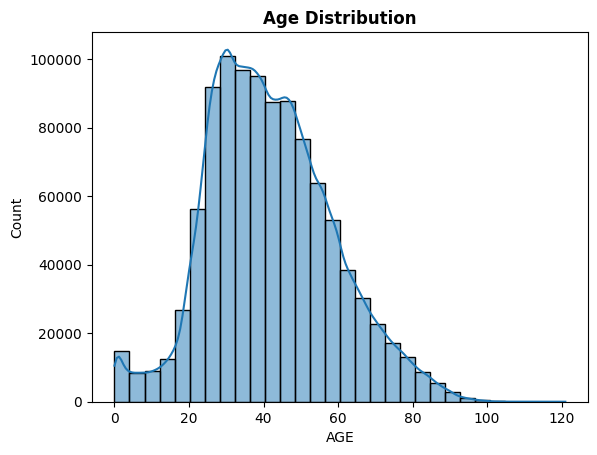

In [ ]:
sns.histplot(df["AGE"],bins=30,ec="black",kde=True)
plt.title("Age Distribution", fontweight="bold")
plt.show()

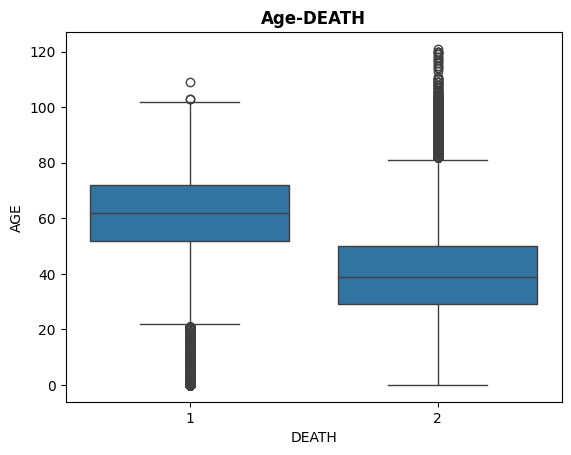

In [ ]:
sns.boxplot(x="DEATH", y="AGE",data=df)
plt.title("Age-DEATH", fontweight="bold")
plt.show()

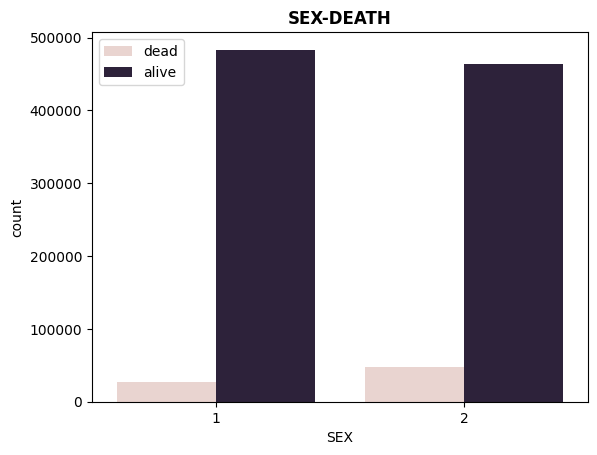

In [ ]:
sns.countplot(x=df.SEX, hue=df.DEATH)
plt.title("SEX-DEATH", fontweight="bold")
plt.legend(loc="best",labels=["dead", "alive"])
plt.show()

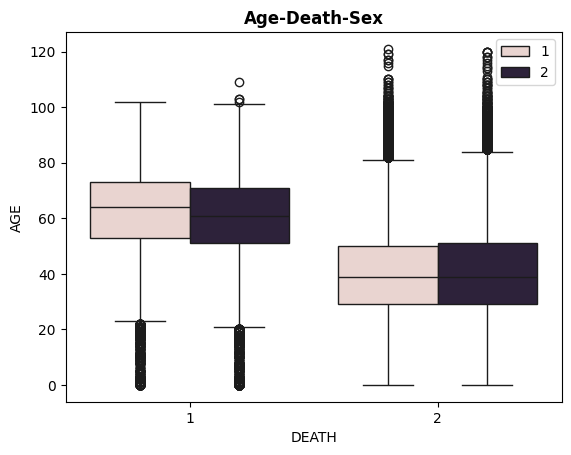

In [ ]:
sns.boxplot(x="DEATH", y="AGE", hue="SEX", data=df)
plt.title("Age-Death-Sex",fontweight="bold")
plt.legend(loc="best")
plt.show()

### **Observation** : DEATH rate of the older patients is significantly higher than the younger ones. And sex does not effect DEATH rate much. But male has a  slightly more DEATH rate compare to female.
#### But age range could be troublesome later in terms of number of variables compare to other features because of its wider range. So grouping into age groups would be better.

*   Young : 0-30 yrs.
*   Middle-Aged : 30-65 yrs.
*   Old : 65-120 yrs.



In [ ]:
df['AGE_GROUP'] = 0

for i, row in df.iterrows():
    age = row['AGE']

    if 0 <= age < 30:
        df.at[i, 'AGE_GROUP'] = 1
    elif 30 <= age < 65:
        df.at[i, 'AGE_GROUP'] = 2
    else:
        df.at[i, 'AGE_GROUP'] = 3

In [ ]:
df.AGE_GROUP.value_counts()

2    675861
1    244496
3    101620
Name: AGE_GROUP, dtype: int64

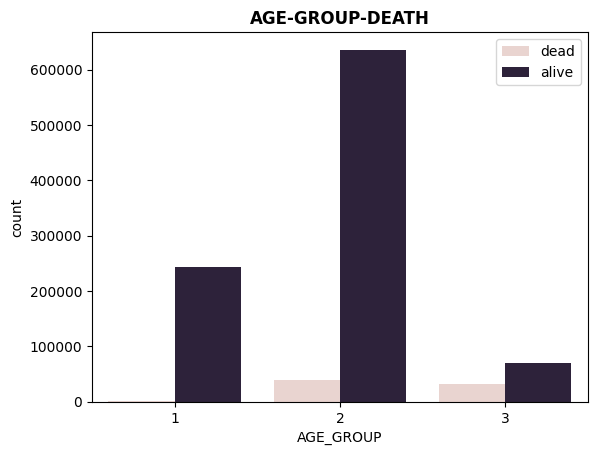

In [ ]:
sns.countplot(x=df.AGE_GROUP, hue=df.DEATH)
plt.title("AGE-GROUP-DEATH", fontweight="bold")
plt.legend(loc="best",labels=["dead", "alive"])
plt.show()

In [ ]:
df = df.drop("AGE", axis = 1)

In [ ]:
for i in df.columns:
    print("{:<20} => {:>10}".format(i, df[i].nunique()))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
PNEUMONIA            =>          2
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          2
DEATH                =>          2
AGE_GROUP            =>          3


## **Correlation Matrix** is used to find the correlation patterns between multiple variables in dataset.

Text(0.5, 1.0, 'Correlation Between Features')

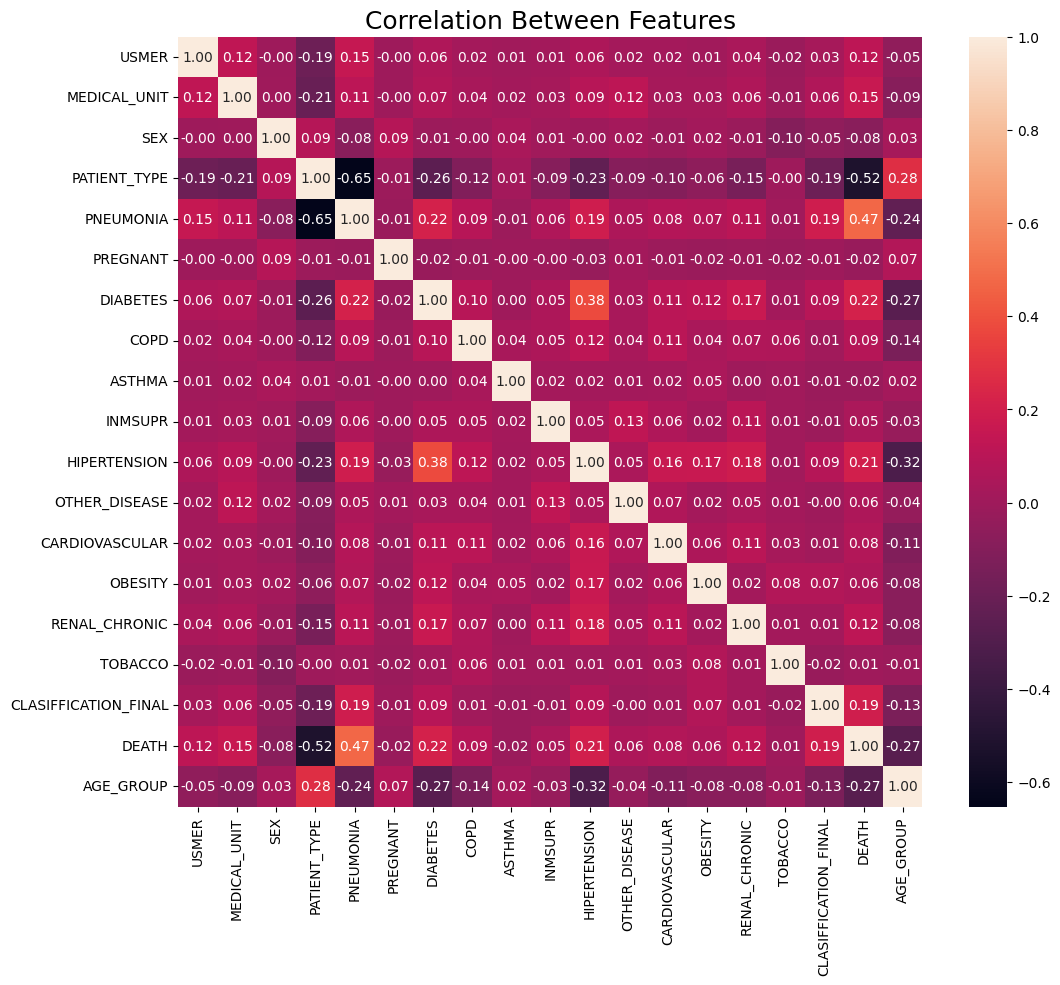

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)

## Dropping columns that has correlation matrix value lower than 0.1

In [ ]:
to_drop_cols = ["SEX", "PREGNANT", "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "TOBACCO", "AGE_GROUP"]
df = df.drop(columns=to_drop_cols)
df

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,2,1,2,1,1
1,2,1,1,1,2,1,1,2,1
2,2,1,2,2,1,2,2,1,1
3,2,1,1,2,2,2,2,2,1
4,2,1,1,2,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...
1048570,2,13,1,2,2,2,2,2,2
1048571,1,13,2,2,2,1,2,2,2
1048572,2,13,1,2,2,2,2,2,2
1048573,2,13,1,2,2,2,2,2,2


In [ ]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT"])
df.head()

,USMER,PATIENT_TYPE,PNEUMONIA,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH,MEDICAL_UNIT_1,MEDICAL_UNIT_2,...,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
0,2,1,1,2,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,1,1,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,1,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,2,2,2,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,2,1,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in df.columns:
  print(df[i].unique())

[2 1]
[1 2]
[1 2]
[2 1]
[1 2]
[2 1]
[1 2]
[1 2]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


## **This dataset's boolean value : 1 means 'yes' and 2 means 'no'. Which is kinda counter intuitive so let's change it to 1 means True and 0 means False**

In [ ]:
df.USMER = [0 if each == 2 else 1 for each in df.USMER]
df.PATIENT_TYPE = [0 if each == 2 else 1 for each in df.PATIENT_TYPE]
df.PNEUMONIA = [0 if each == 2 else 1 for each in df.PNEUMONIA]
df.DIABETES = [0 if each == 2 else 1 for each in df.DIABETES]
df.HIPERTENSION = [0 if each == 2 else 1 for each in df.HIPERTENSION]
df.RENAL_CHRONIC = [0 if each == 2 else 1 for each in df.RENAL_CHRONIC]
df.CLASIFFICATION_FINAL = [0 if each == 2 else 1 for each in df.CLASIFFICATION_FINAL]
df.DEATH = [0 if each == 2 else 1 for each in df.DEATH]

In [ ]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [ ]:
for i in df.columns:
  print(df[i].unique())

[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [ ]:
x.columns

Index(['USMER', 'PATIENT_TYPE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION',
       'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'MEDICAL_UNIT_1',
       'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5',
       'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9',
       'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12',
       'MEDICAL_UNIT_13'],
      dtype='object')

In [ ]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: DEATH, Length: 1021977, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (817581, 20)
x_test : (204396, 20)
y_train : (817581,)
y_test : (204396,)


In [ ]:
x_train

,USMER,PATIENT_TYPE,PNEUMONIA,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
927774,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
233768,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
285741,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
838534,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
304839,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267038,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
376699,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
133062,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
691527,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
x_train

,USMER,PATIENT_TYPE,PNEUMONIA,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
927774,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
233768,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
285741,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
838534,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
304839,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267038,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
376699,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
133062,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
691527,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train

927774    0
233768    0
285741    0
838534    0
304839    0
         ..
267038    0
376699    0
133062    0
691527    0
123074    0
Name: DEATH, Length: 817581, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_test

,USMER,PATIENT_TYPE,PNEUMONIA,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13
1027024,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
515396,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
213781,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
437599,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
626478,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885358,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
253698,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
109155,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
686802,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


[[185441   4156]
 [  9332   5467]]
Logistic Regressor Accuracy : 0.9340104503023543


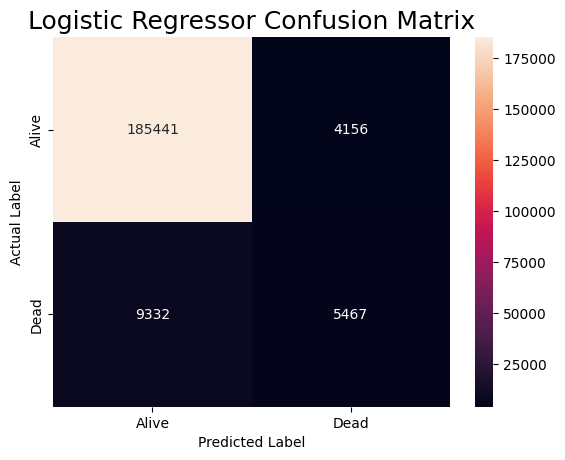

In [ ]:
y_pred = logistic_regressor.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regressor Confusion Matrix", fontsize=18)
print("Logistic Regressor Accuracy : {}".format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.metrics import f1_score

print("Logistic Regressor F1 Score :",f1_score(y_test,logistic_regressor.predict(x_test),average=None))

Logistic Regressor F1 Score : [0.96490881 0.44771108]


## **Problem with unbalanced dataset. Let's see.**

<ipython-input-74-5466fdf66ea3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.DEATH, palette=["crimson", "midnightblue"])


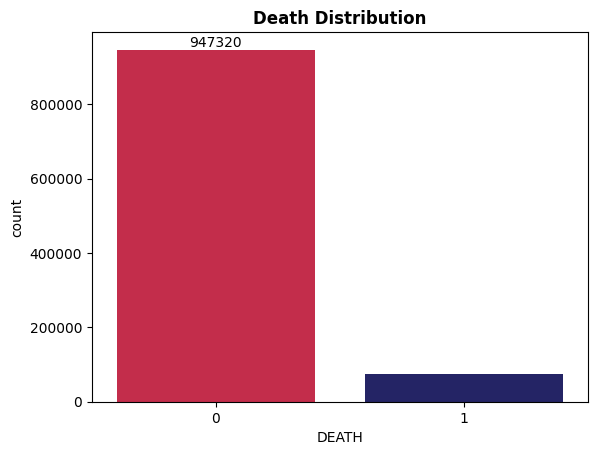

In [ ]:
ax = sns.countplot(x=df.DEATH, palette=["crimson", "midnightblue"])
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontweight="bold")
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x,y)

<ipython-input-76-3009d9630977>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_resampled, palette=["crimson", "midnightblue"])


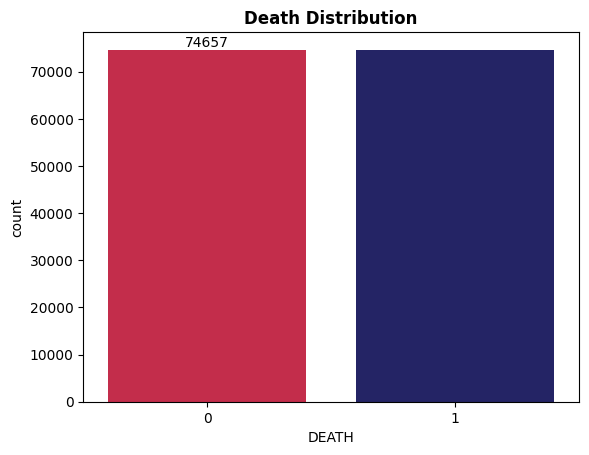

In [ ]:
ax = sns.countplot(x=y_resampled, palette=["crimson", "midnightblue"])
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontweight="bold")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)
acc_list = []

x_train : (119451, 20)
x_test : (29863, 20)
y_train : (119451,)
y_test : (29863,)


In [ ]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[13074  1815]
 [ 1187 13787]]
Logistic Regressor Accuracy : 0.8994742658138835


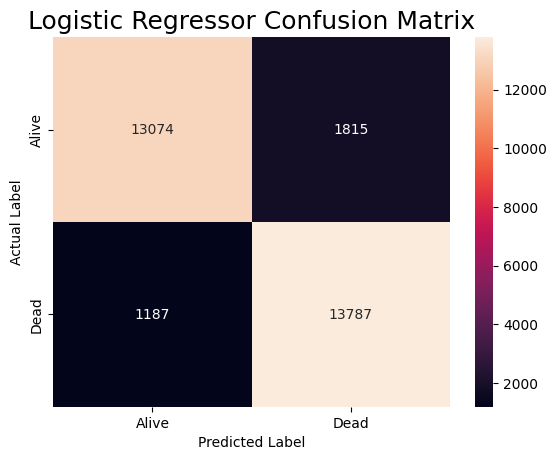

In [ ]:
y_pred = logistic_regressor.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Logistic Regressor Confusion Matrix", fontsize=18)
print("Logistic Regressor Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("Logistic Regressor F1 Score :",f1_score(y_test, y_pred, average=None))

Logistic Regressor F1 Score : [0.89701544 0.90181842]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.92      0.88      0.90     14889
           1       0.88      0.92      0.90     14974

    accuracy                           0.90     29863
   macro avg       0.90      0.90      0.90     29863
weighted avg       0.90      0.90      0.90     29863



In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

[[12920  1969]
 [  858 14116]]
SVM Classifier Accuracy : 0.9053343602451194


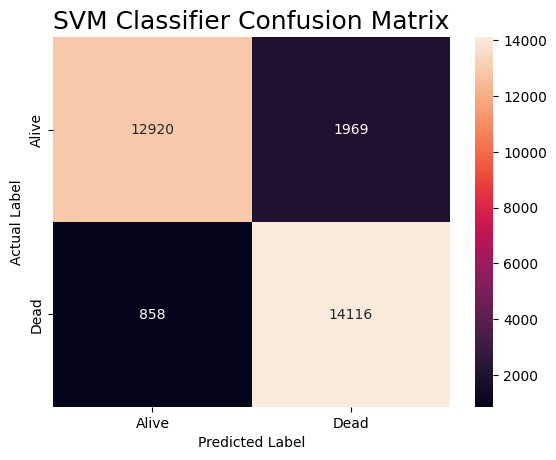

In [ ]:
y_pred = svm_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("SVM Classifier Confusion Matrix", fontsize=18)
print("SVM Classifier Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("SVM Classifier F1 Score :",f1_score(y_test, y_pred, average=None))

SVM Classifier F1 Score : [0.90138487 0.90897968]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.94      0.87      0.90     14889
           1       0.88      0.94      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.91      0.91      0.91     29863



In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[[12916  1973]
 [  838 14136]]
XGB Classifier Accuracy : 0.9058701403074038


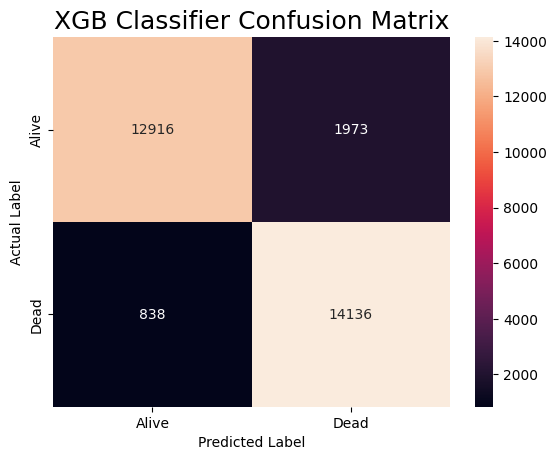

In [ ]:
y_pred = xgb_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("XGB Classifier Confusion Matrix", fontsize=18)
print("XGB Classifier Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("XGB Classifier F1 Score :",f1_score(y_test, y_pred, average=None))

XGB Classifier F1 Score : [0.90186084 0.90956471]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.94      0.87      0.90     14889
           1       0.88      0.94      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.91      0.91      0.91     29863



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

[[12903  1986]
 [ 1189 13785]]
KNN Classifier Accuracy : 0.893681143890433


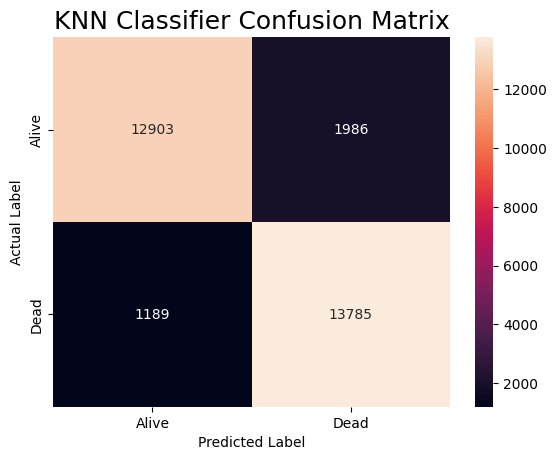

In [ ]:
y_pred = knn_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("KNN Classifier Confusion Matrix", fontsize=18)
print("KNN Classifier Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("KNN Classifier F1 Score :",f1_score(y_test, y_pred, average=None))

KNN Classifier F1 Score : [0.89044546 0.89673118]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.92      0.87      0.89     14889
           1       0.87      0.92      0.90     14974

    accuracy                           0.89     29863
   macro avg       0.89      0.89      0.89     29863
weighted avg       0.89      0.89      0.89     29863



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

[[12708  2181]
 [ 1467 13507]]
NB Classifier Accuracy : 0.8778421457991494


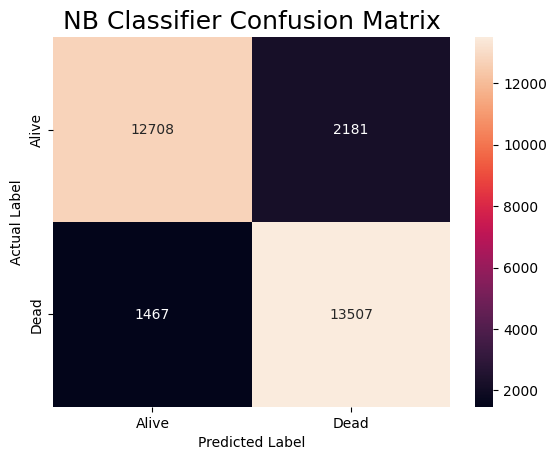

In [ ]:
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("NB Classifier Confusion Matrix", fontsize=18)
print("NB Classifier Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("NB Classifier F1 Score :",f1_score(y_test, y_pred, average=None))

NB Classifier F1 Score : [0.8744839  0.88102537]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.90      0.85      0.87     14889
           1       0.86      0.90      0.88     14974

    accuracy                           0.88     29863
   macro avg       0.88      0.88      0.88     29863
weighted avg       0.88      0.88      0.88     29863



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[[12903  1986]
 [  842 14132]]
RF Classifier Accuracy : 0.9053008739912266


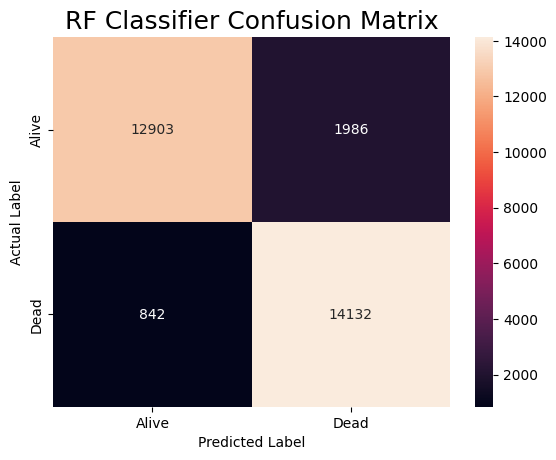

In [ ]:
y_pred = rf_classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Alive", "Dead"], yticklabels=["Alive", "Dead"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("RF Classifier Confusion Matrix", fontsize=18)
print("RF Classifier Accuracy : {}".format(accuracy_score(y_test, y_pred)))
acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import f1_score

print("RF Classifier F1 Score :",f1_score(y_test, y_pred, average=None))

RF Classifier F1 Score : [0.90123629 0.90904413]


In [ ]:
from sklearn.metrics import classification_report
print('\n', classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           0       0.94      0.87      0.90     14889
           1       0.88      0.94      0.91     14974

    accuracy                           0.91     29863
   macro avg       0.91      0.91      0.91     29863
weighted avg       0.91      0.91      0.91     29863



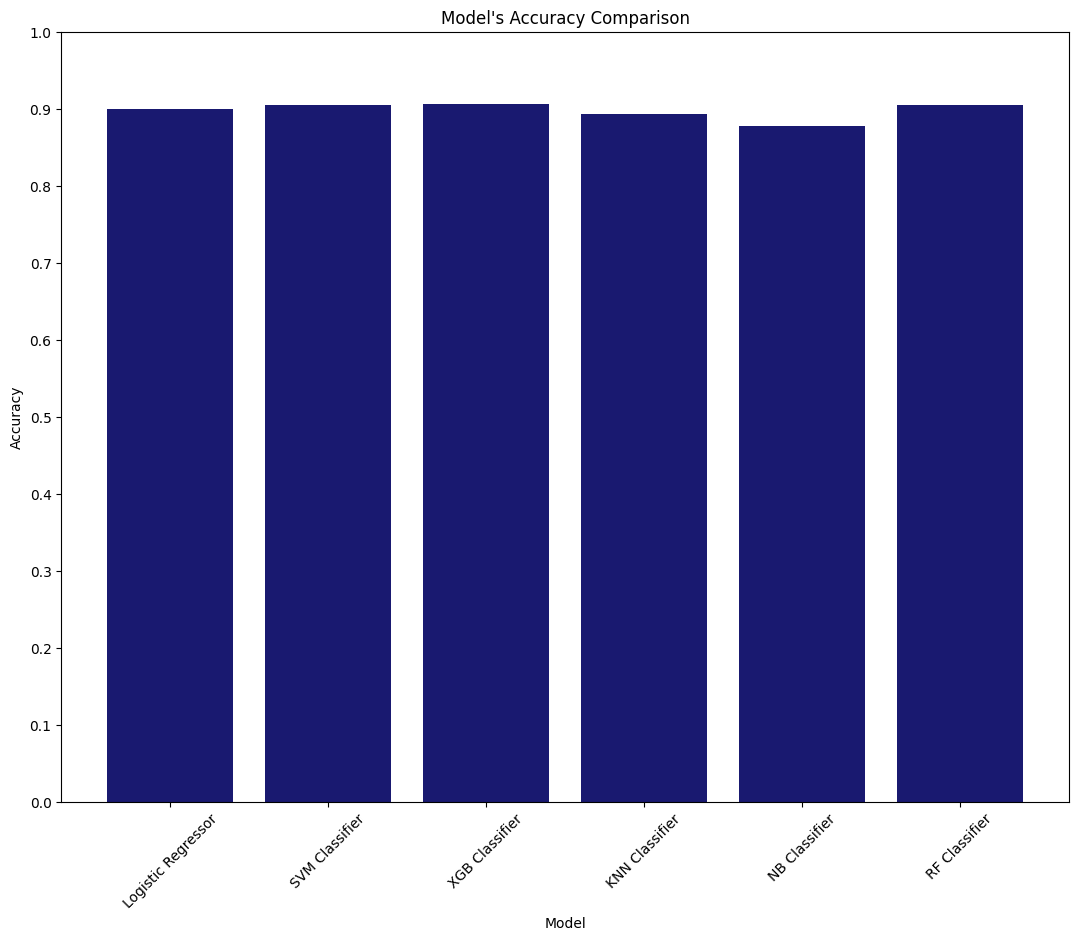

In [ ]:
models = ["Logistic Regressor", "SVM Classifier", "XGB Classifier", "KNN Classifier", "NB Classifier", "RF Classifier"]
plt.figure(figsize=(13,10))
plt.bar(models, acc_list, color='midnightblue')
plt.title("Model's Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.yticks([i/10 for i in range(11)])
plt.show()

In [ ]:
!pip install joblib

In [ ]:
import joblib

joblib.dump(logistic_regressor, 'Logistic Regressor.pkl')
joblib.dump(svm_classifier, 'SVM Classifier.pkl')
joblib.dump(xgb_classifier, 'XGB Classifier.pkl')
joblib.dump(knn_classifier, 'KNN Classifier.pkl')
joblib.dump(nb_classifier, 'NB Classifier.pkl')
joblib.dump(rf_classifier, 'RF Classifier.pkl')

['RF Classifier.pkl']